In [4]:
import cv2 as cv
import matplotlib.pyplot as plt

In [15]:
def plot_results(original, new):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Before Processing")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(new, cmap='gray')
    plt.title("After Processing")
    plt.axis('off')

    plt.show()

In [11]:
def gaussian_denoise(image, sigma=5, kernel_size=7):
    denoised_image = cv.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    return denoised_image

In [12]:
def adaptive_thresholding(image, block_size=31, C=3):
    adaptive_threshold_image = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, block_size, C)
    return adaptive_threshold_image

In [13]:
def detect_stars_and_connect(image):
    constellation_image = image.copy()
    
    # Find contours (stars)
    contours, _ = cv.findContours(constellation_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    # Calculate centroids of stars
    points = []
    for cnt in contours:
        if cv.contourArea(cnt) > 5:  # Filter out very small contours (noise)
            M = cv.moments(cnt)
            if M["m00"] > 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                points.append((cx, cy))
    
    # Delaunay triangulation
    if len(points) >= 3:
        rect = (0, 0, constellation_image.shape[1], constellation_image.shape[0])
        subdiv = cv.Subdiv2D(rect)
        for p in points:
            subdiv.insert(p)
        
        # Drawing edges
        edges = subdiv.getEdgeList()
        for edge in edges:
            x1, y1, x2, y2 = map(int, edge[:4])
            cv.line(constellation_image, (x1, y1), (x2, y2), (255, 255, 255), 1)
    
    return constellation_image

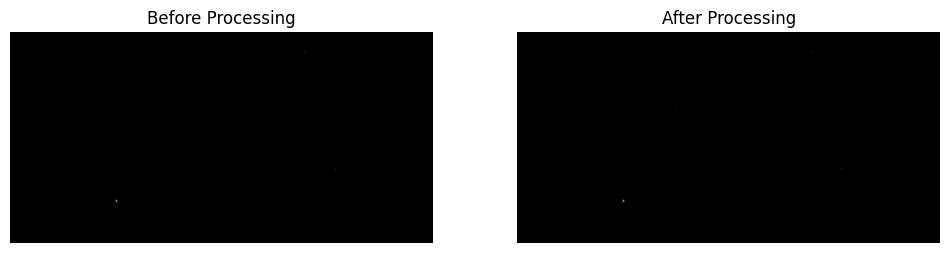

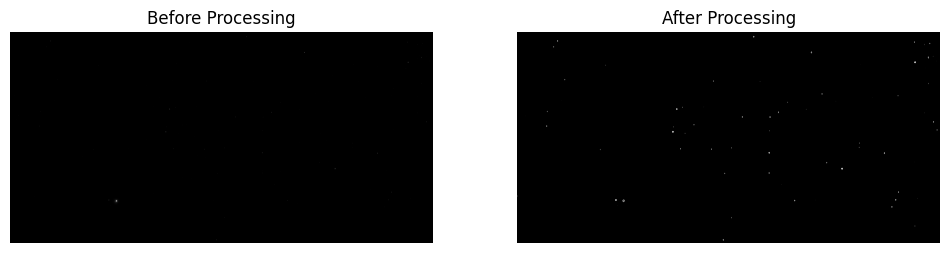

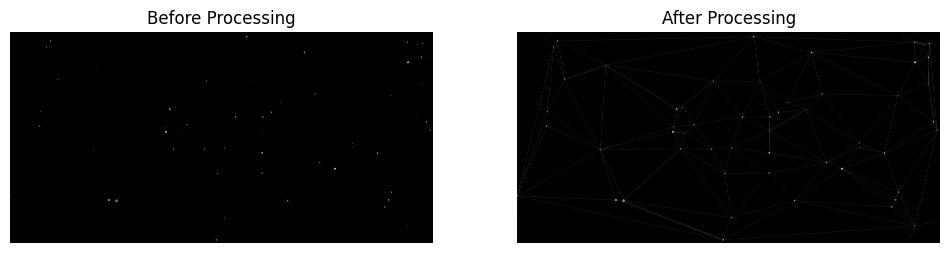

True

In [25]:
image_path = "gemini_constellation.jpg"
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

denoised_image = gaussian_denoise(image)
plot_results(image, denoised_image)
cv.imwrite("denoised_"+image_path, denoised_image)

thresholded_image = adaptive_thresholding(image)
plot_results(denoised_image, thresholded_image)
cv.imwrite("thresholded_denoised_"+image_path, thresholded_image)

connected_stars_image = detect_stars_and_connect(thresholded_image)
plot_results(thresholded_image, connected_stars_image)
cv.imwrite("connected_"+image_path, connected_stars_image)

In [26]:
def plot_and_save_all_steps(original, denoised, thresholded, connected, image_path):
    plt.figure(figsize=(12, 40))

    images = [original, denoised, thresholded, connected]
    titles = ["Original", "Denoised", "Thresholded", "Connected Stars"]

    for i in range(len(titles)):
        plt.subplot(4, 1, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    combined_path = "combined_results_" + image_path
    plt.savefig(combined_path)
    plt.close()
    print("Combined image saved as:", combined_path)

plot_and_save_all_steps(image, denoised_image, thresholded_image, connected_stars_image, image_path)

Combined image saved as: combined_results_gemini_constellation.jpg
